# Driver model

Here are our implementation of driver model.

1. Import ego-vehicle driving signals and surrounding vehicle signals
2. Build variational autoencoder
3. Visualize latent space
![](proposed_framework.png)


In [1]:
# data import
import os
import pickle
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def dynamic(signal):
    N = 10
    o_t = []
    T = len(signal)
    for t in range(T):
        if t < (T - 2*N):
            sum1 = sum(n * signal.iloc[t + n] for n in range(2 * N) if t + n < T)
            sum2 = sum(n * n for n in range(2 * N) if t + n < T)
            if sum2 == 0:
                sum2 = 1
            else:
                o_t.append(sum1 / sum2)
        else:
            o_t.append(o_t[t-1])
    return o_t

In [3]:
def get_dynamic_data(x):
    """
    Argument:
    x --  driving signals
    
    Returns:
    X -- driving signals with first order and second order signals
    """
    feature_names = ['brake', 'accel',  'velocity', 'steering_angle', 'a_lon', 'a_lat']
    dynamic_features = ['brake', 'accel', 'steering_angle']
    X = pd.DataFrame(data=x)
    X.columns = feature_names
    
    for feature in dynamic_features:
        print('Get dynamic value of feature {}'.format(feature))
        f1_feature = '1st_order_' + feature
        o_t = dynamic(X[feature])
        X[f1_feature] = o_t
        s2_feature =  '2nd_order_' + feature
        o_o_t = dynamic(X[f1_feature])
        X[s2_feature] = o_o_t
        
    return X

In [2]:
data_in_time = ['during', 'before', 'during']
pickle_dir = os.getcwd() + '/fi_pickle/'

for data_time in data_in_time:
    print("This is data from time segment {} lane change.\n".format(data_time))
    filename = pickle_dir + data_time+ '_lane_change_raw_data.pickle'
    if os.path.isfile(filename):
        with open(filename, mode='rb') as f:
            raw_data = pickle.load(f)
            risk_labels = raw_data[0]
            drv_data = raw_data[1]
            surr_data = raw_data[2]
            trash = raw_data[3]
            tags = raw_data[4]
            #print(len(tags))
            #print(drv_data)     
            
    else:
        print('File {} not exist'.format(filename))

This is data from time segment during lane change.

859
This is data from time segment before lane change.

859
This is data from time segment during lane change.

859


11
f9605A
f9608A
m9600A
m9601A
m9602B
m9603A
m9604A
m9606A
m9607A
m9609A
m9611A


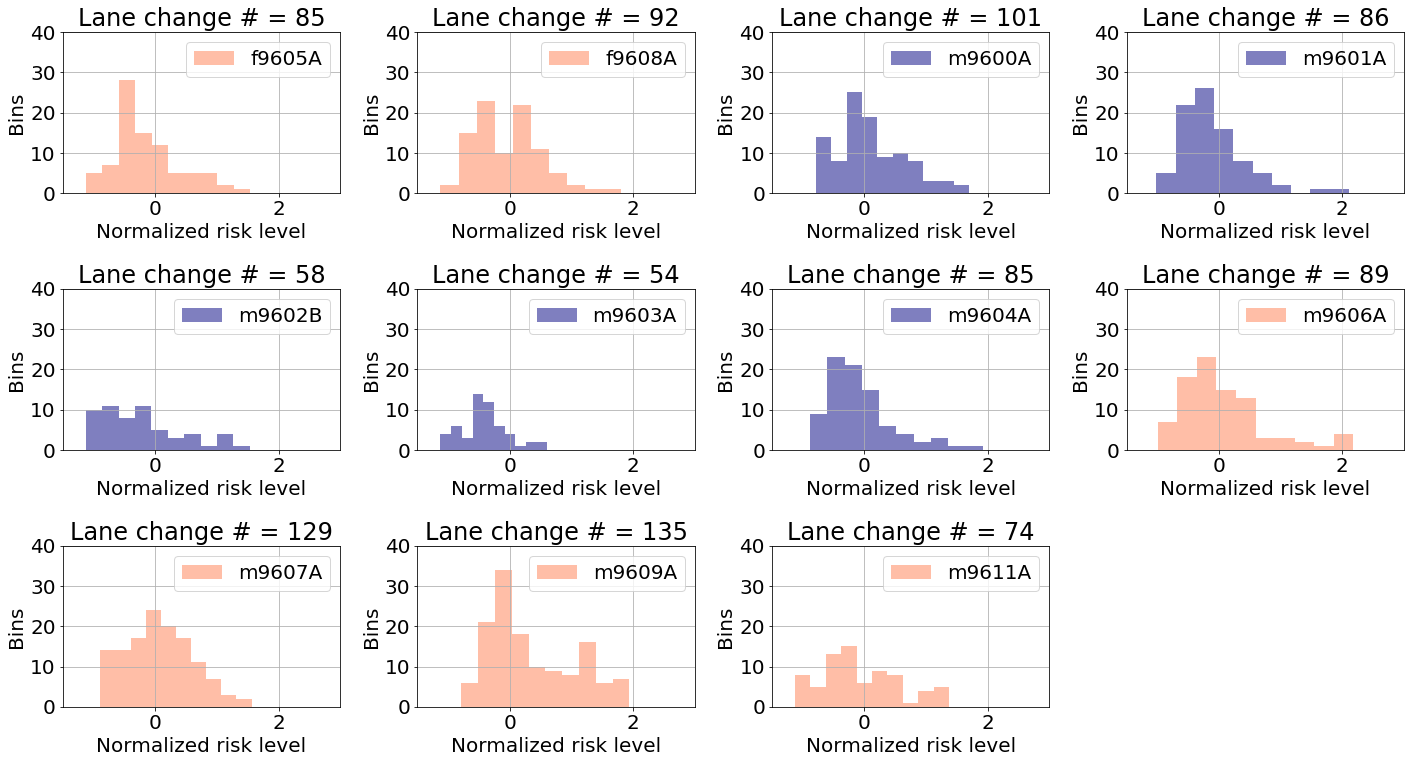

In [55]:
import seaborn as sns
from scipy import stats
expert = ['m9600A', 'm9601A', 'm9602B', 'm9603A', 'm9604A']
normal = ['f9605A', 'm9606A', 'm9607A', 'f9608A', 'm9609A', 'm9611A']
def individual_riskness():
    file_dir = '/home/hona/workspace/data/lc_data/03_risk_level_data'
    info_file = os.path.join(file_dir, '9600_lane_change_risk_scores.csv')
    driver_risk = pd.read_csv(info_file)
    #print(driver_risk.head())
    drivers = driver_risk.groupby('driver')
    i = 1
    plt.rcParams.update({'font.size': 20})
    print(len(drivers))
    fig = plt.figure(figsize=(20, 11))
    for driver, data in drivers:
        if str(driver) in expert:
            color = 'navy'
        elif str(driver)  in normal:
            color = 'coral'
        else:
            color = 'red'
        
        plt.subplot(3, 4, i)
        print(driver)
        risk = data['normalized_risk']
        plt.hist(risk, bins=10, alpha=0.5, label=str(driver),color=color)
        plt.legend()
        plt.xlim([-1.5,3])
        plt.ylim([0,40])
        plt.grid()
        plt.title("Lane change # = "+ str(len(risk)))
        plt.xlabel("Normalized risk level")
        plt.ylabel("Bins")
        plt.tight_layout()
        plt.savefig('driver_histogram.png', format='png')
        i+=1        
    #sns.distplot(driver_risk.normalized_risk,  hue="driver");

individual_riskness()    